## Designing, Implementing and Verifying IIR Filter
<b>Tools used:</b> Python and Verilog<br><br>
<b>Problem:</b> <p>Desiging an IIR LOWPASS Butterworth filter, at any desired $\omega$ and implementing it using a Verilog program. Running a simulation and cross-checking the result with the one simulated in Python.</p><br>
<b>Background:</b><p>Desiging a IIR filter is a lengthy and Time consuming process. Thanks to latest tools like MATLAB and Python (Scipy), It has become easy as the strenuous calculations are done by the computers. Once the calculations are done, the frequecy response, as well as simulations can be done in the same language to know how the calculated coefficients perform.</p>
<p>If, this filter is to be implemented on hardware such as FPGA, one should go about writing the made design, using a Hardware Description Language such as VHDL or Verilog. What I have done here is, designing a LPF butterworth filter using Python and simulate to see how it works using some arbitrary inputs. Once this is done, I implement it using Verilog (behavioural style) and write a test bench to simulate it with the same arbitrary inputs and compare both the output signals.</p>

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
omega = 0.3 #desired cut-off
N = 2 #Order of the filter
b,a = signal.butter(N,omega,'lowpass')
w,h = signal.freqs(b,a)

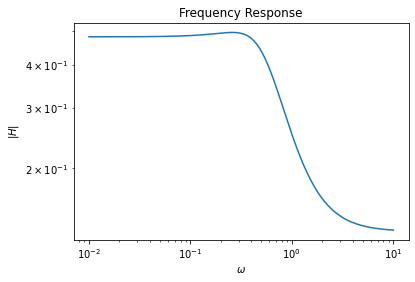

In [3]:
plt.loglog(w,np.abs(h))
plt.xlabel('$\omega$')
plt.ylabel('$|H|$')
plt.title("Frequency Response")
plt.show()

Coefficients of Numerator(b) and Denominator(a)

In [4]:
b,a

(array([0.13110644, 0.26221288, 0.13110644]),
 array([ 1.        , -0.74778918,  0.27221494]))

#### Sample Input and simulation

In [5]:
x = np.array([0.1,0.2,0.1,0.24,0.12,0.02,0.2,0.15,0.38,0.2])
y = signal.lfilter(b,a,x)
print(x)
print(y)

[0.1  0.2  0.1  0.24 0.12 0.02 0.2  0.15 0.38 0.2 ]
[0.01311064 0.06224657 0.12164226 0.15792644 0.17675735 0.15474052
 0.11479561 0.11845091 0.17270089 0.2424279 ]


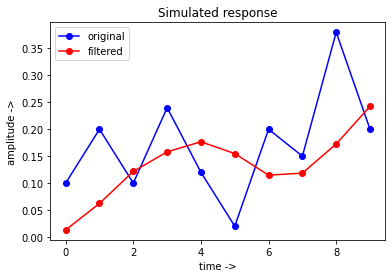

In [6]:
plt.plot(np.arange(len(x)),x,'bo-',label = 'original')
plt.plot(np.arange(len(y)),y,'ro-', label = 'filtered')
plt.title('Simulated response')
plt.xlabel('time ->')
plt.ylabel('amplitude ->')
plt.legend(loc=0)
plt.show()

The Code for IIR implementation of this filter was written in verilog, and the ouput obtained is manually copied into the block below. It is to be noted that the <b>Maximum gain of the filter was 0.5 (not unity)</b>. Hence, we scale the output signal by 2, just to match the waveform for comparision. 

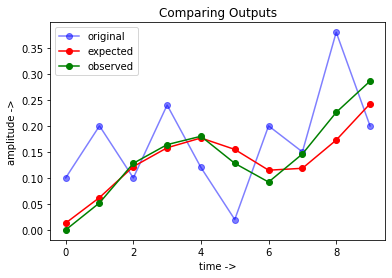

In [7]:
veri_out = np.array([0,26,64,82,90,64,46,73,113,143])/500
plt.plot(np.arange(len(x)),x,'bo-',label='original',alpha=0.5)
plt.plot(np.arange(len(y)),y,'ro-',label='expected')
plt.plot(np.arange(len(veri_out)),veri_out,'go-',label = 'observed')
plt.title('Comparing Outputs')
plt.xlabel('time ->')
plt.ylabel('amplitude ->')
plt.legend(loc=0)
plt.show()

<b>Conclusion:</b><br>The impemented filter works as expected but is not ideal due to many conditions, which are to be considered <br>
- The Maximum gain of the filter is not Unity
- The observed waveform do not match the ideal. This is possibly because of using Fixed-point Arithmetic for calculation, which involves truncation of the bits in order to make the calculation simple for the processor.
- Rounding off errors